# XGBoost Practise with Iris Dataset

In [27]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import xgboost as xgb
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")

In [28]:
# Load the iris dataset
iris = sns.load_dataset('iris')

# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [29]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [30]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: xlabel='species', ylabel='count'>

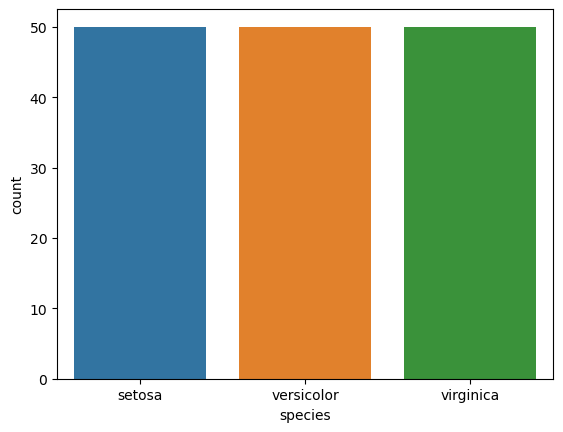

In [32]:
# Create a countplot of the 'species' column
sns.countplot(x='species', data=iris)

In [33]:
iris2 = pd.get_dummies(iris,columns = ["species"])
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [42]:
iris["species"] = iris["species"].replace({"setosa":0,
                                           "versicolor":1,"virginica":2}) 

In [43]:
X = iris.drop("species",axis =1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
y = iris["species"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [45]:
y.unique()

array([0, 1, 2], dtype=int64)

# Train test split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            random_state=42, stratify=y)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [55]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            seed=42)

# Fit the model with early stopping and evaluation metric
clf_xgb.fit(
    X_train, 
    y_train, 
    eval_set=[(X_test, y_test)],  # Evaluation set for early stopping
    verbose=True                  # Verbose to show the progress
)

[0]	validation_0-mlogloss:0.77297
[1]	validation_0-mlogloss:0.58222
[2]	validation_0-mlogloss:0.45855
[3]	validation_0-mlogloss:0.36830
[4]	validation_0-mlogloss:0.31026
[5]	validation_0-mlogloss:0.26936
[6]	validation_0-mlogloss:0.24040
[7]	validation_0-mlogloss:0.22339
[8]	validation_0-mlogloss:0.20329
[9]	validation_0-mlogloss:0.19265
[10]	validation_0-mlogloss:0.18502
[11]	validation_0-mlogloss:0.18168
[12]	validation_0-mlogloss:0.17600
[13]	validation_0-mlogloss:0.17978
[14]	validation_0-mlogloss:0.17928
[15]	validation_0-mlogloss:0.17719
[16]	validation_0-mlogloss:0.18315
[17]	validation_0-mlogloss:0.18858
[18]	validation_0-mlogloss:0.19029
[19]	validation_0-mlogloss:0.19171
[20]	validation_0-mlogloss:0.20051
[21]	validation_0-mlogloss:0.20189
[22]	validation_0-mlogloss:0.20659
[23]	validation_0-mlogloss:0.20672
[24]	validation_0-mlogloss:0.21064
[25]	validation_0-mlogloss:0.21491
[26]	validation_0-mlogloss:0.21783
[27]	validation_0-mlogloss:0.21789
[28]	validation_0-mlogloss:0.2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

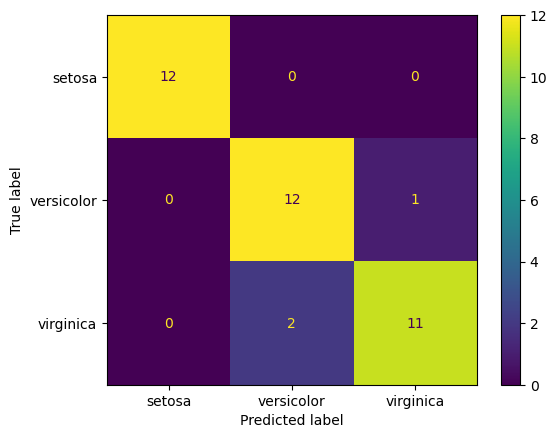

In [56]:
y_pred = clf_xgb.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["setosa",
                                              "versicolor",
                                              "virginica"])

# Use the plot method to render the display with a custom format
disp.plot(values_format='d')

In [50]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learn_rate=0.1,
                            max_depth=4,
                            reg_lambda=10,
                            scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5)

clf_xgb.fit(X_train, y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:0.89061
[1]	validation_0-mlogloss:0.74077
[2]	validation_0-mlogloss:0.61672
[3]	validation_0-mlogloss:0.52830
[4]	validation_0-mlogloss:0.45925
[5]	validation_0-mlogloss:0.40809
[6]	validation_0-mlogloss:0.37572
[7]	validation_0-mlogloss:0.34804
[8]	validation_0-mlogloss:0.32064
[9]	validation_0-mlogloss:0.29685
[10]	validation_0-mlogloss:0.27541
[11]	validation_0-mlogloss:0.26541
[12]	validation_0-mlogloss:0.25682
[13]	validation_0-mlogloss:0.24966
[14]	validation_0-mlogloss:0.24687
[15]	validation_0-mlogloss:0.23994
[16]	validation_0-mlogloss:0.23553
[17]	validation_0-mlogloss:0.22892
[18]	validation_0-mlogloss:0.22442
[19]	validation_0-mlogloss:0.21876
[20]	validation_0-mlogloss:0.21525
[21]	validation_0-mlogloss:0.21479
[22]	validation_0-mlogloss:0.21250
[23]	validation_0-mlogloss:0.21193
[24]	validation_0-mlogloss:0.20942
[25]	validation_0-mlogloss:0.20973
[26]	validation_0-mlogloss:0.20876
[27]	validation_0-mlogloss:0.20767
[28]	validation_0-mlogloss:0.2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=0.1, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

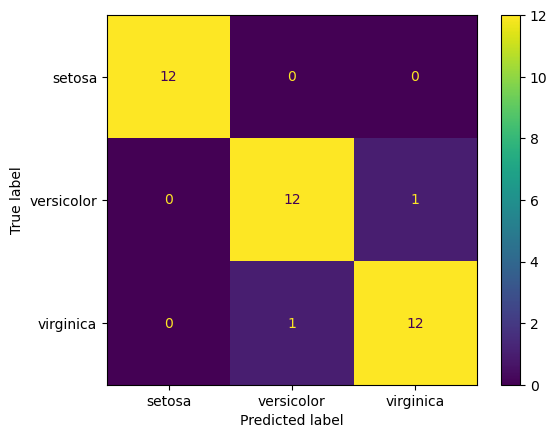

In [51]:
y_pred = clf_xgb.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["setosa",
                                              "versicolor",
                                              "virginica"])

# Use the plot method to render the display with a custom format
disp.plot(values_format='d')

In [52]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9473684210526315